In [100]:
import pandas as pd
import numpy as np
from preparing_data import prepare_data

In [101]:
prepare_data('train')

In [ ]:
train_data = pd.read_csv('Prepared_data_train.csv')

Error: Session cannot generate requests

In [ ]:
train_data.head()

,client_id,treatment_flg,purchased,age,gender,first_reedem_ts,first_issue_ts,last_ts,pred_last_ts,days_own_bc,days_from_last_purch,count_purch_before_fr,count_purch_after_fr,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,ad6561e2d8,1,1,50.0,2.0,1.527102,1.512322,1.552759e+09,1.551885e+09,17961.632112,10.118160,0.0,206,12,1,40,10801.41,0.0,0.000000,270.035250
1,7c1ccbf93f,1,1,24.0,2.0,1.519326,1.510332,1.551793e+09,1.550561e+09,17946.310249,14.255637,0.0,14,1,0,2,851.00,0.0,0.000000,425.500000
2,b58fadcab6,1,1,36.0,0.0,1.537045,1.509657,1.552730e+09,1.552308e+09,17966.524600,4.889722,0.0,248,31,0,33,14171.77,0.0,0.000000,429.447576
3,e99e6fabb9,0,0,79.0,2.0,1.527713,1.526466,1.552635e+09,1.552378e+09,17967.339612,2.972963,0.0,47,1,0,13,2872.00,0.0,0.000000,220.923077
4,27fb6f8520,1,1,34.0,2.0,1.513332,1.500320,1.552920e+09,1.552547e+09,17969.295480,4.318727,0.0,100,13,0,30,9886.21,-50.0,-1.666667,329.540333


In [ ]:
train_X = train_data.drop(columns=['client_id', 'treatment_flg', 'purchased', 'last_ts', 'pred_last_ts'])

In [ ]:
train_y = train_data.treatment_flg * train_data.purchased + (1-train_data.treatment_flg) * (1-train_data.purchased)

Трансформируем целевую переменную

In [ ]:
train_X = np.asarray(train_X.values)
train_y = np.asarray(train_y.values)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.33, random_state = 50)

In [ ]:
clf_rf = RandomForestClassifier()

In [ ]:
PARAMS = {'n_estimators':[100],
          'max_depth':range(4,15,2),
          'min_samples_leaf':range(2,12,3),
          'min_samples_split':range(2,12,3),
          "criterion":['gini']}

In [ ]:
def training_model(train_X, train_y):
    rf_clf = RandomForestClassifier()
    grid_search_cv = RandomizedSearchCV(rf_clf, PARAMS, cv=3)
    grid_search_cv.fit(train_X, train_y)
    best_clf = grid_search_cv.best_estimator_
    return best_clf 

In [ ]:
best_clf_wrc = training_model(train_X, train_y)

In [ ]:
prediction_proba = best_clf_wrc.predict_proba(val_X)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
prediction_proba


array([0.51508947, 0.51180127, 0.51239094, ..., 0.48249576, 0.50961732,
       0.51403506])

In [ ]:
rac = roc_auc_score(val_y, prediction_proba.reshape(-1,1))

In [ ]:
2*rac - 1

0.05196680476508919

In [ ]:
prepare_data('test')

In [ ]:
test_data = pd.read_csv('Prepared_data_test.csv')
test_data.shape

(54820, 18)

In [ ]:
test_data.head()

,client_id,age,gender,first_reedem_ts,first_issue_ts,last_ts,pred_last_ts,days_own_bc,days_from_last_purch,count_purch_before_fr,count_purch_after_fr,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,ebd7360016,63.0,2.0,1.504283,1.499102,1.552823e+09,1.552658e+09,17970.578941,1.907558,0.0,115,18,0,31,5680.57,0.0,0.0,183.244194
1,908cd9b8e8,49.0,2.0,1.531502,1.522429,1.551888e+09,1.551366e+09,17955.630191,6.038391,0.0,88,8,0,17,6193.04,0.0,0.0,364.296471
2,dceb8ce861,46.0,0.0,1.534013,1.507310,1.551803e+09,1.551367e+09,17955.640769,5.040521,0.0,117,6,0,6,8265.26,0.0,0.0,1377.543333
3,f4f0ac6b06,45.0,0.0,1.550262,1.530136,1.551811e+09,1.551552e+09,17957.782563,2.996065,0.0,169,11,5,12,8960.00,0.0,0.0,746.666667
4,5047ab8574,57.0,0.0,1.509973,1.501430,1.551183e+09,1.549283e+09,17931.513513,21.989444,0.0,10,3,1,4,826.00,-100.0,-25.0,206.500000


In [ ]:
test_X = test_data.drop(columns=['client_id', 'last_ts', 'pred_last_ts'])

In [ ]:
test_data.shape 

(54820, 18)

In [ ]:
test_X

,age,gender,first_reedem_ts,first_issue_ts,days_own_bc,days_from_last_purch,count_purch_before_fr,count_purch_after_fr,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,63.0,2.0,1.504283,1.499102,17970.578941,1.907558,0.0,115,18,0,31,5680.57,0.0,0.000000,183.244194
1,49.0,2.0,1.531502,1.522429,17955.630191,6.038391,0.0,88,8,0,17,6193.04,0.0,0.000000,364.296471
2,46.0,0.0,1.534013,1.507310,17955.640769,5.040521,0.0,117,6,0,6,8265.26,0.0,0.000000,1377.543333
3,45.0,0.0,1.550262,1.530136,17957.782563,2.996065,0.0,169,11,5,12,8960.00,0.0,0.000000,746.666667
4,57.0,0.0,1.509973,1.501430,17931.513513,21.989444,0.0,10,3,1,4,826.00,-100.0,-25.000000,206.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54815,26.0,1.0,1.545833,1.527783,17972.457100,0.326169,0.0,153,17,5,30,11462.29,0.0,0.000000,382.076333
54816,37.0,1.0,1.515347,1.506674,17931.490804,35.821065,0.0,16,2,2,10,994.47,0.0,0.000000,99.447000
54817,42.0,0.0,1.553968,1.538601,17969.640815,2.974514,0.0,241,17,3,34,9591.75,0.0,0.000000,282.110294
54818,33.0,0.0,1.549103,1.545762,17966.557100,2.078704,0.0,53,7,0,14,2817.00,-60.0,-4.285714,201.214286


In [ ]:
prediction_proba = best_clf_wrc.predict_proba(test_X)[:, 1]

(array([4.4000e+01, 1.4690e+03, 3.6074e+04, 1.4537e+04, 1.6290e+03,
        7.0900e+02, 2.6300e+02, 6.6000e+01, 1.5000e+01, 1.4000e+01]),
 array([0.42628835, 0.45782746, 0.48936657, 0.52090567, 0.55244478,
        0.58398389, 0.61552299, 0.6470621 , 0.67860121, 0.71014031,
        0.74167942]),
 <BarContainer object of 10 artists>)

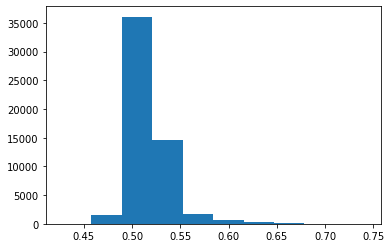

In [ ]:
import matplotlib.pyplot as plt
plt.hist(prediction_proba)

In [ ]:
out_data = pd.DataFrame(test_data.client_id)

In [ ]:
prediction_proba.shape

(54820,)

In [ ]:
test_data.shape

(54820, 18)

In [ ]:
out_data['pred'] = prediction_proba

In [ ]:
out_data.to_csv('results.csv', index=False)